### Título



##### Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

### Importação da Base de Dados

In [2]:
file_path = "C:\\Users\\camil\\OneDrive\\Ambiente de Trabalho\\DadosHabitarLisboa.xlsx"
df = pd.read_excel(file_path)

# Contar o número de linhas e colunas
num_observacoes, num_colunas = df.shape
num_observacoes #10 279 observações
num_colunas #8 variáveis/colunas

df.head()

,Contexto,Estado,Data Estado,Escalão Etário,Nº Elem. Agregado,Nº Adultos,Concelho,Rendimento Global (IRS e Rend. Isentos)
0,Registo de Adesão,Registado,2023-06-02,35 a 65 anos,1,1,Lisboa,20671.86
1,Registo de Adesão,Registado,2024-11-05,35 a 65 anos,2,1,Lisboa,6677.50
2,Registo de Adesão,Registado,2023-09-26,Menos 35 anos,1,1,Óbidos,35000.00
3,Registo de Adesão,Registado,2023-09-22,35 a 65 anos,2,1,Lisboa,38366.02
4,Registo de Adesão,Registado,2023-09-30,Menos 35 anos,1,1,Lisboa,18415.37


In [3]:
df.nunique()

Contexto                                      1
Estado                                        1
Data Estado                                 374
Escalão Etário                                3
Nº Elem. Agregado                             8
Nº Adultos                                    6
Concelho                                    193
Rendimento Global (IRS e Rend. Isentos)    9799
dtype: int64

Contexto e Estado são colunas inúteis

### Daddos

##### Seleção de Variáveis 

In [4]:
df = df[['Data Estado', 'Escalão Etário','Concelho', 'Nº Elem. Agregado','Nº Adultos', 'Rendimento Global (IRS e Rend. Isentos)']]

##### Correção dos Tipos de Dados e Criação de Novas Variáveis

In [5]:
#df.dtypes
df['Data Estado'] = pd.to_datetime(df['Data Estado']) 
#Criar as variáveis Ano, Mês, Monoparaental
df['Ano'] = df['Data Estado'].dt.year
df['Mês'] = df['Data Estado'].dt.month
df['Monoparental'] = ((df['Nº Adultos'] == 1) & (df['Nº Elem. Agregado'] > 1))

df.head()

,Data Estado,Escalão Etário,Concelho,Nº Elem. Agregado,Nº Adultos,Rendimento Global (IRS e Rend. Isentos),Ano,Mês,Monoparental
0,2023-06-02,35 a 65 anos,Lisboa,1,1,20671.86,2023,6,False
1,2024-11-05,35 a 65 anos,Lisboa,2,1,6677.50,2024,11,True
2,2023-09-26,Menos 35 anos,Óbidos,1,1,35000.00,2023,9,False
3,2023-09-22,35 a 65 anos,Lisboa,2,1,38366.02,2023,9,True
4,2023-09-30,Menos 35 anos,Lisboa,1,1,18415.37,2023,9,False


## Análise Exploratória de Dados

#### Variaveis, Valores Omissos e Distintos

In [6]:
#Valores Omissos
df.isna().sum()  #não existem valores omissos no dataset

Data Estado                                0
Escalão Etário                             0
Concelho                                   0
Nº Elem. Agregado                          0
Nº Adultos                                 0
Rendimento Global (IRS e Rend. Isentos)    0
Ano                                        0
Mês                                        0
Monoparental                               0
dtype: int64

In [72]:
df[["Nº Elem. Agregado", "Nº Adultos", "Rendimento Global (IRS e Rend. Isentos)"]].describe()

,Nº Elem. Agregado,Nº Adultos,Rendimento_Mensal_Bruto(IRS e Rend. Isentos)
count,10279.000000,10279.000000,10279.000000
mean,1.794824,1.391964,1349.217550
std,1.073495,0.622421,810.688908
min,1.000000,1.000000,17.194167
25%,1.000000,1.000000,822.500000
50%,1.000000,1.000000,1152.787500
75%,2.000000,2.000000,1724.419583
max,8.000000,6.000000,5408.533333


*Concelho*

In [8]:
#Nomes dos concelhos que existem na base de dados
#df['Concelho'].unique()

df_distritos = pd.read_csv("DistritosConcelhos.csv", sep=";")
#df_distritos.head()

df = pd.merge(df, df_distritos[['Concelho', 'Distrito']], on='Concelho', how='left')
df.head()

,Data Estado,Escalão Etário,Concelho,Nº Elem. Agregado,Nº Adultos,Rendimento Global (IRS e Rend. Isentos),Ano,Mês,Monoparental,Distrito
0,2023-06-02,35 a 65 anos,Lisboa,1,1,20671.86,2023,6,False,Lisboa
1,2024-11-05,35 a 65 anos,Lisboa,2,1,6677.50,2024,11,True,Lisboa
2,2023-09-26,Menos 35 anos,Óbidos,1,1,35000.00,2023,9,False,Leiria
3,2023-09-22,35 a 65 anos,Lisboa,2,1,38366.02,2023,9,True,Lisboa
4,2023-09-30,Menos 35 anos,Lisboa,1,1,18415.37,2023,9,False,Lisboa


In [9]:
df['Distrito'].unique()

array(['Lisboa', 'Leiria', 'Setúbal', 'Porto', 'Santarém', 'Guarda',
       'Coimbra', 'Bragança', 'Aveiro', 'Viseu', 'Faro', 'Évora',
       'Castelo Branco', nan, 'Braga', 'Viana do Castelo', 'Vila Real',
       'Beja', 'Portalegre'], dtype=object)

In [10]:
sem_distrito = df[df['Distrito'].isna()]
sem_distrito['Concelho'].unique()

array(['Porto Santo', 'Calheta (São Jorge)', 'Santa Cruz', 'Funchal',
       'Lagoa (Algarve)', 'Câmara de Lobos', 'Angra do Heroísmo',
       'Praia da Vitória', 'Ponta Delgada', 'Calheta (Madeira)',
       'Ponta do Sol', 'Lagoa (São Miguel)', 'Ribeira Brava',
       'Vila do Porto', 'Machico', 'Madalena', 'Horta', 'Porto Moniz'],
      dtype=object)

In [12]:
# Dicionário de correção com concelhos e os seus respectivos distritos
correcao_distritos = {
    'Porto Santo': 'Madeira',  
    'Calheta (São Jorge)': 'Açores', 
    'Santa Cruz': 'Madeira', 
    'Funchal': 'Madeira', 
    'Lagoa (Algarve)': 'Faro', 
    'Câmara de Lobos': 'Madeira',
    'Angra do Heroísmo': 'Açores',
    'Praia da Vitória': 'Açores',
    'Ponta Delgada': 'Açores',
    'Calheta (Madeira)': 'Madeira',
    'Ponta do Sol': 'Madeira',
    'Lagoa (São Miguel)': 'Açores',
    'Ribeira Brava': 'Madeira',
    'Vila do Porto': 'Açores',
    'Machico': 'Madeira',
    'Madalena': 'Açores',
    'Horta': 'Açores',
    'Porto Moniz': 'Madeira'
}

df['Distrito'] = df.apply(lambda row: correcao_distritos.get(row['Concelho'], row['Distrito']), axis=1)

In [19]:
df['Distrito'].unique()
df['Distrito'].nunique()

20

### Visualizações Gráficas

#### -------- Concelhos e Distritos

Tabela de Frequências dos Registos por Distrito:
Distrito
Lisboa              9110
Setúbal              567
Santarém             132
Leiria                92
Porto                 79
Coimbra               40
Faro                  36
Évora                 33
Madeira               27
Aveiro                26
Viseu                 25
Beja                  23
Braga                 19
Açores                18
Castelo Branco        16
Portalegre            11
Guarda                10
Viana do Castelo       7
Vila Real              5
Bragança               3
Name: count, dtype: int64


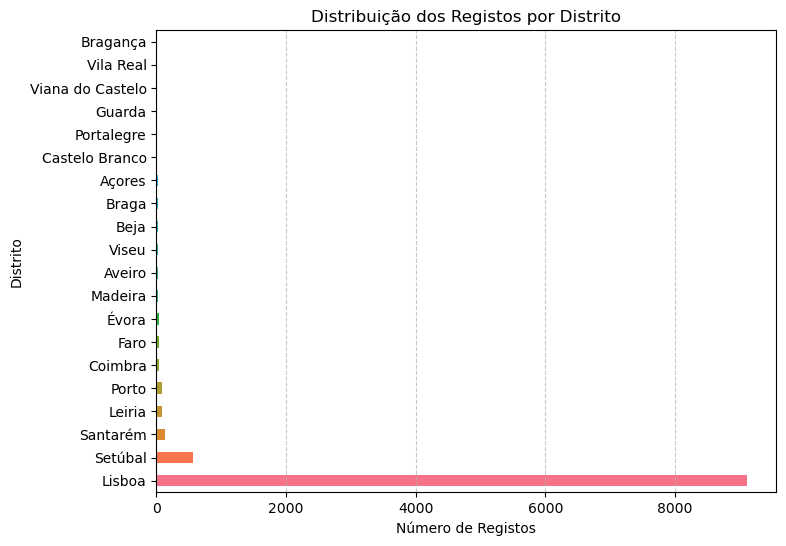

In [28]:
#Distribuição dos registos por distrito
contagem_distritos = df['Distrito'].value_counts()

print("Tabela de Frequências dos Registos por Distrito:")
print(contagem_distritos) 

plt.figure(figsize=(8, 6))
cores = sns.color_palette("husl", len(contagem_distritos))
contagem_distritos.plot(kind='barh', color=cores)
plt.title('Distribuição dos Registos por Distrito')
plt.ylabel('Distrito')
plt.xlabel('Número de Registos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Tabela de Frequências dos Registos por Concelho em Lisboa:
Concelho
Lisboa                    6291
Sintra                     569
Loures                     568
Amadora                    510
Odivelas                   416
Oeiras                     269
Vila Franca de Xira        190
Cascais                    150
Mafra                       48
Torres Vedras               39
Alenquer                    19
Azambuja                    15
Arruda dos Vinhos            9
Lourinhã                     7
Cadaval                      6
Sobral de Monte Agraço       4
Name: count, dtype: int64


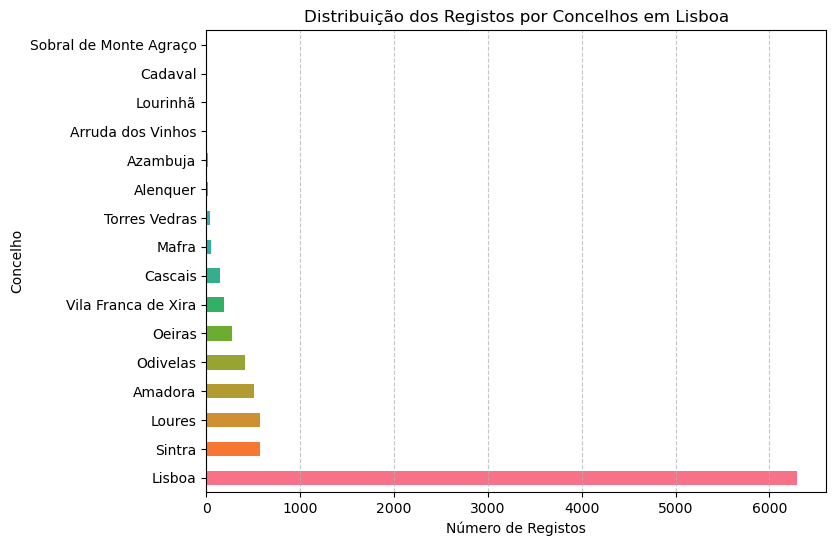

In [26]:
#Distribuição dos registos por concelhos de Lisboa
df_lisboa = df[df['Distrito'] == 'Lisboa']

contagem_concelhosLisboa = df_lisboa['Concelho'].value_counts()

print("Tabela de Frequências dos Registos por Concelho em Lisboa:")
print(contagem_concelhosLisboa) 

plt.figure(figsize=(8, 6))
cores = sns.color_palette("husl", len(contagem_concelhosLisboa))
contagem_concelhosLisboa.plot(kind='barh', color=cores)
plt.title('Distribuição dos Registos por Concelhos em Lisboa')
plt.ylabel('Concelho')
plt.xlabel('Número de Registos')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

####-------*Escalão Etário*

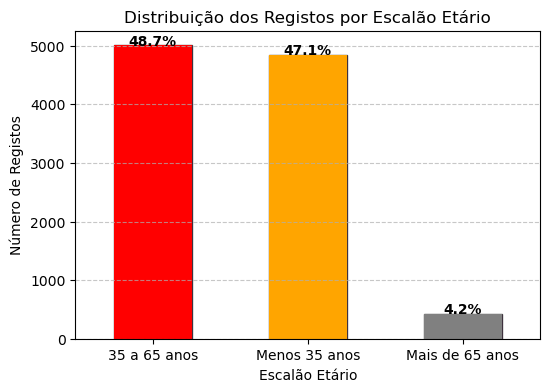

In [29]:
df['Escalão Etário'].unique()

#Distribuição dos registos por escalão etário
contagem_escaloes = df['Escalão Etário'].value_counts()
frequencia_relativa = (contagem_escaloes / contagem_escaloes.sum()) * 100
plt.figure(figsize=(6, 4))
ax = contagem_escaloes.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
for i, (count, perc) in enumerate(zip(contagem_escaloes, frequencia_relativa)):
    ax.text(i, count + 1, f'{perc:.1f}%', ha='center', fontsize=10, fontweight='bold')
contagem_escaloes.plot(kind='bar', color=['red', 'orange', 'gray'])
plt.title('Distribuição dos Registos por Escalão Etário')
plt.xlabel('Escalão Etário')
plt.ylabel('Número de Registos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

#### ----------*Nº Elem. Agregado* 

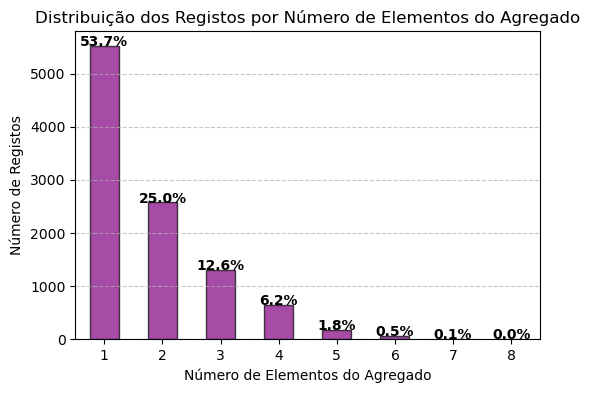

In [30]:
#Verificar valores unicos da variável
df['Nº Elem. Agregado'].unique()  #o número de elementos do agregado familiar varia desde 1 até 8 membros

#Distribuição de registos por nº elementos do agregado
contagem_elementos = df['Nº Elem. Agregado'].value_counts().sort_index()
frequencia_relativa = (contagem_elementos / contagem_elementos.sum()) * 100
plt.figure(figsize=(6, 4))
ax = contagem_elementos.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
for i, (count, perc) in enumerate(zip(contagem_elementos, frequencia_relativa)):
    ax.text(i, count + 1, f'{perc:.1f}%', ha='center', fontsize=10, fontweight='bold')
plt.title('Distribuição dos Registos por Número de Elementos do Agregado')
plt.xlabel('Número de Elementos do Agregado')
plt.ylabel('Número de Registos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### --------Temporalidade dos Registos na App

*Mês*

In [107]:
df['Mês'].unique() #

array([ 6, 11,  9, 12,  1,  7,  4, 10,  2,  3,  5,  8])

*Ano*

In [97]:
df['Ano'].unique() #

array([2023, 2024])

C:\Users\camil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\camil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


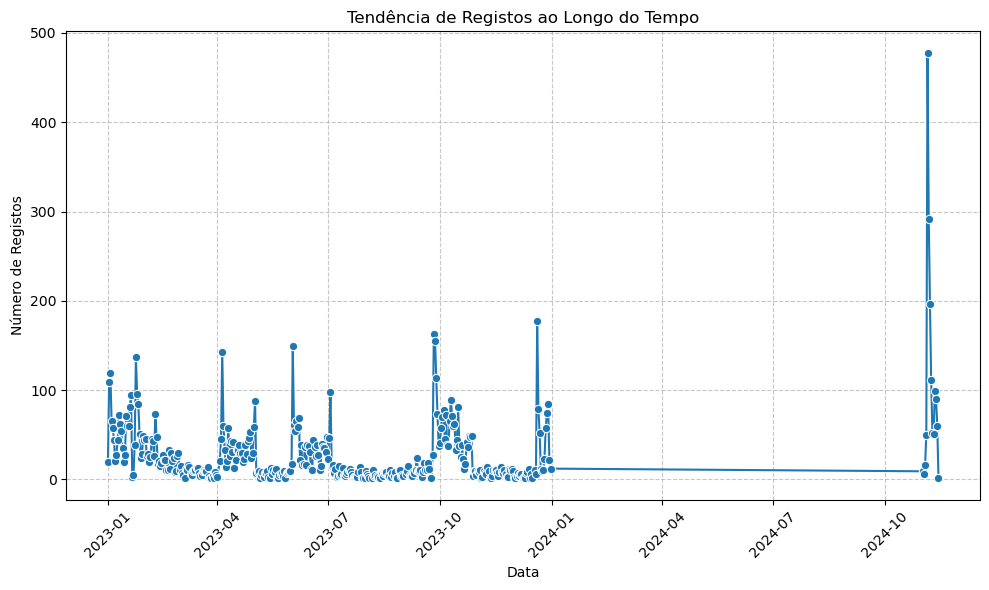

In [39]:
registos_data = df.groupby('Data Estado').size().reset_index(name='Número de Registos')

# Plotar o gráfico de tendência
plt.figure(figsize=(10, 6))
sns.lineplot(x='Data Estado', y='Número de Registos', data=registos_data, marker='o')
plt.title('Tendência de Registos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Registos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\camil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\camil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


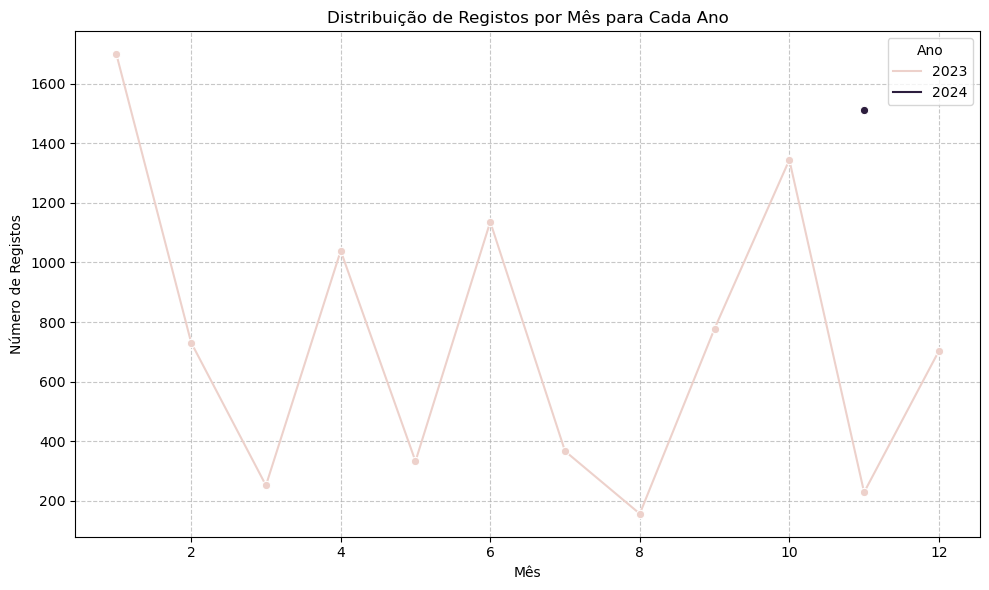

In [44]:
# Agrupar os dados por Mês e Ano
registos_mes_ano = df.groupby(['Ano', 'Mês']).size().reset_index(name='Número de Registos')

# Plotar gráfico de linhas por ano
plt.figure(figsize=(10, 6))
sns.lineplot(x='Mês', y='Número de Registos', hue='Ano', data=registos_mes_ano, marker='o')
plt.title('Distribuição de Registos por Mês para Cada Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Registos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


OU


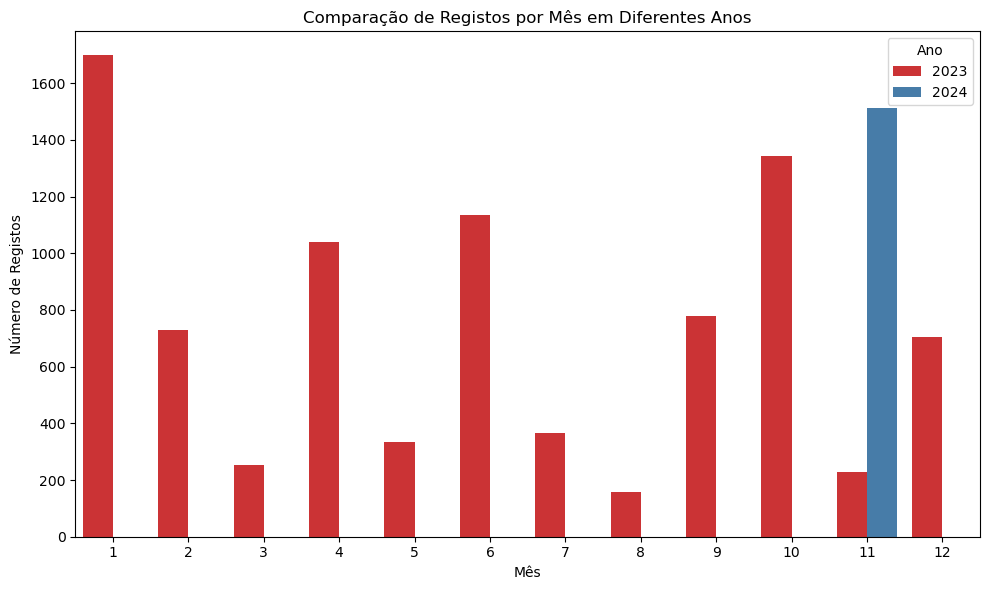

In [47]:
# Agrupar os dados por Mês e Ano
registos_mes_ano = df.groupby(['Ano', 'Mês']).size().reset_index(name='Número de Registos')

# Plotar gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x='Mês', y='Número de Registos', hue='Ano', data=registos_mes_ano, palette='Set1')
plt.title('Comparação de Registos por Mês em Diferentes Anos')
plt.xlabel('Mês')
plt.ylabel('Número de Registos')
plt.tight_layout()
plt.show()


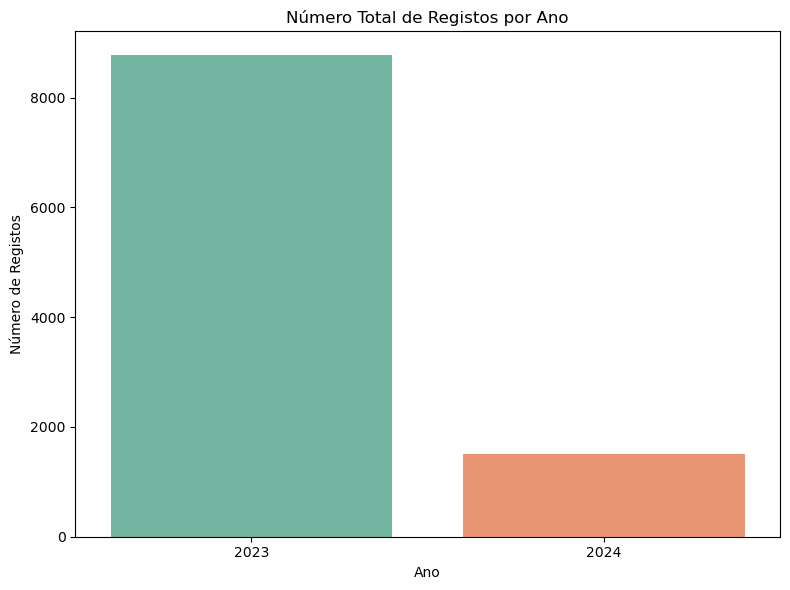

In [45]:
registos_ano = df.groupby('Ano').size().reset_index(name='Número de Registos')

plt.figure(figsize=(8, 6))
sns.barplot(x='Ano', y='Número de Registos', data=registos_ano, palette='Set2')
plt.title('Número Total de Registos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Registos')
plt.tight_layout()
plt.show()


In [48]:
df_2023 = df[df['Ano'] == 2023]
df_2024 = df[df['Ano'] == 2024]

# Contar o número de registros por mês para 2023
frequencias_2023 = df_2023.groupby('Mês').size().reset_index(name='Número de Registos 2023')

# Contar o número de registros por mês para 2024
frequencias_2024 = df_2024.groupby('Mês').size().reset_index(name='Número de Registos 2024')

# Contar o número total de registros para 2023 e 2024
total_2023 = frequencias_2023['Número de Registos 2023'].sum()
total_2024 = frequencias_2024['Número de Registos 2024'].sum()

frequencias_2023.loc['Total'] = frequencias_2023['Número de Registos 2023'].sum()
frequencias_2024.loc['Total'] = frequencias_2024['Número de Registos 2024'].sum()

print("Frequência de Registos por Mês em 2023")
print(frequencias_2023)
print("\nFrequência de Registos por Mês em 2024")
print(frequencias_2024)

print(f"\nTotal de Registos em 2023: {total_2023}")
print(f"Total de Registos em 2024: {total_2024}")


Frequência de Registos por Mês em 2023
        Mês  Número de Registos 2023
0         1                     1698
1         2                      731
2         3                      252
3         4                     1039
4         5                      333
5         6                     1136
6         7                      367
7         8                      157
8         9                      778
9        10                     1344
10       11                      229
11       12                      703
Total  8767                     8767

Frequência de Registos por Mês em 2024
        Mês  Número de Registos 2024
0        11                     1512
Total  1512                     1512

Total de Registos em 2023: 8767
Total de Registos em 2024: 1512


#### ----------*Monoparental* 

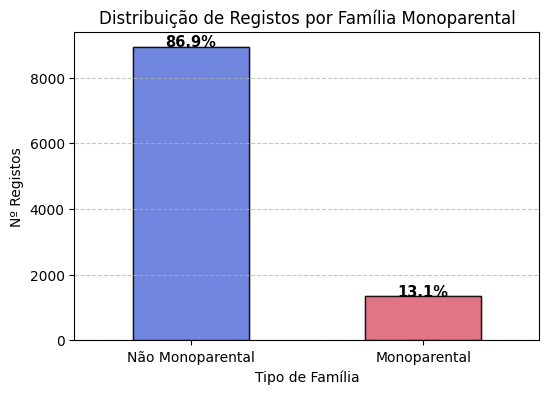

In [98]:
#Distribuição de registos por família monoparental e não monoparental
contagem_monoparental = df['Monoparental'].value_counts()
frequencia_relativa = (contagem_monoparental / contagem_monoparental.sum()) * 100
plt.figure(figsize=(6, 4))
ax = contagem_monoparental.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
for i, (count, perc) in enumerate(zip(contagem_monoparental, frequencia_relativa)):
    ax.text(i, count + 1, f'{perc:.1f}%', ha='center', fontsize=10.5, fontweight='bold')
contagem_monoparental.plot(kind='bar', color=['cornflowerblue', 'lightcoral'], edgecolor='black', alpha=0.8)
plt.title('Distribuição de Registos por Família Monoparental', fontsize=12)
plt.xlabel('Tipo de Família', fontsize=10)
plt.ylabel('Nº Registos', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['Não Monoparental', 'Monoparental'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### ---- *Rendimento Global (IRS e Rend. Isentos)*

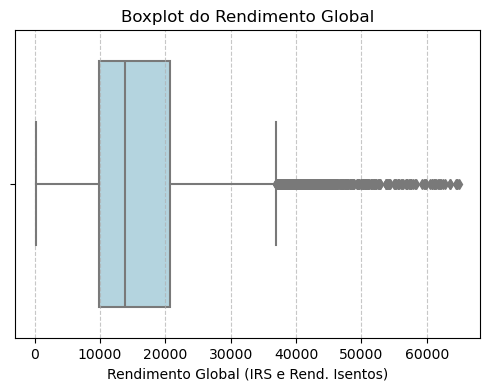

13833.45

In [34]:
#Boxplot do Rendimento Global
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Rendimento Global (IRS e Rend. Isentos)'], color='lightblue')
plt.title('Boxplot do Rendimento Global')
plt.xlabel('Rendimento Global (IRS e Rend. Isentos)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

df['Rendimento Global (IRS e Rend. Isentos)'].min() #206.33   (manter observações com rendimentos globais baixíssimos?? identificar possíveis explicações para estes casos)
df['Rendimento Global (IRS e Rend. Isentos)'].max() #64902.4
df['Rendimento Global (IRS e Rend. Isentos)'].mean() #16190.61
df['Rendimento Global (IRS e Rend. Isentos)'].median() #13833.45 

#### ----- *Rendimento Mensal (Bruto)*

In [36]:
df['Rendimento_Mensal_Bruto(IRS e Rend. Isentos)'] = df['Rendimento Global (IRS e Rend. Isentos)'] / 12

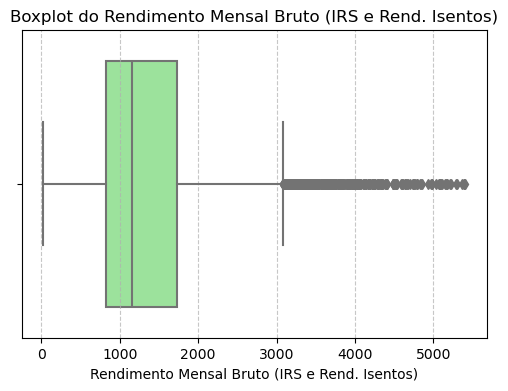

1152.7875000000001

In [37]:
#Boxplot do Rendimento Mensal
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Rendimento_Mensal_Bruto(IRS e Rend. Isentos)'], color='lightgreen')
plt.title('Boxplot do Rendimento Mensal Bruto (IRS e Rend. Isentos)')
plt.xlabel('Rendimento Mensal Bruto (IRS e Rend. Isentos)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


df['Rendimento_Mensal_Bruto(IRS e Rend. Isentos)'].min() #17.19 
df['Rendimento_Mensal_Bruto(IRS e Rend. Isentos)'].max() #5408.53
df['Rendimento_Mensal_Bruto(IRS e Rend. Isentos)'].mean() #1349.22
df['Rendimento_Mensal_Bruto(IRS e Rend. Isentos)'].median() #1152.79

#### ---- Rendimento Mensal Bruto vs Monoparentalidade

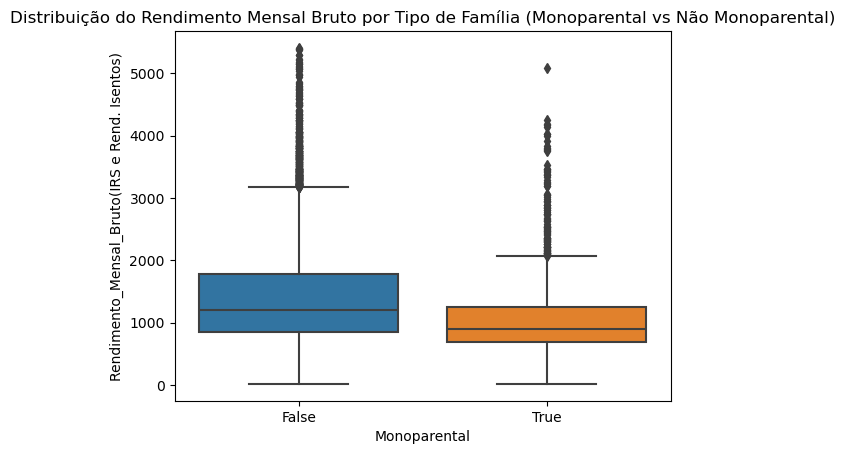

In [50]:
sns.boxplot(x='Monoparental', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', data=df)
plt.title('Distribuição do Rendimento Mensal Bruto por Tipo de Família (Monoparental vs Não Monoparental)')
plt.show()

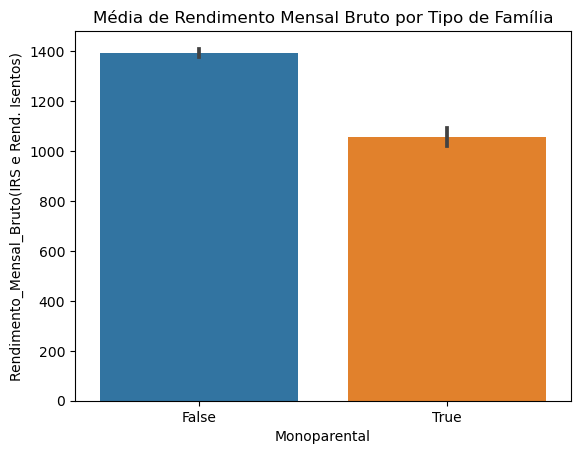

In [52]:
sns.barplot(x='Monoparental', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', data=df)
plt.title('Média de Rendimento Mensal Bruto por Tipo de Família')
plt.show()

#### ----- Rendimento Mensal Bruto vs Faixa Etária

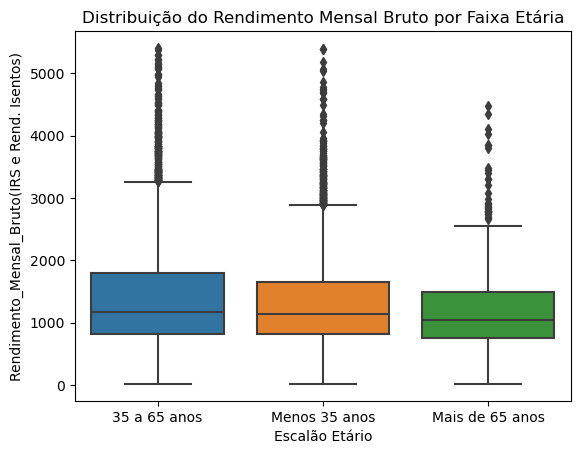

In [57]:
sns.boxplot(x='Escalão Etário', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', data=df)
plt.title('Distribuição do Rendimento Mensal Bruto por Faixa Etária')
plt.show()

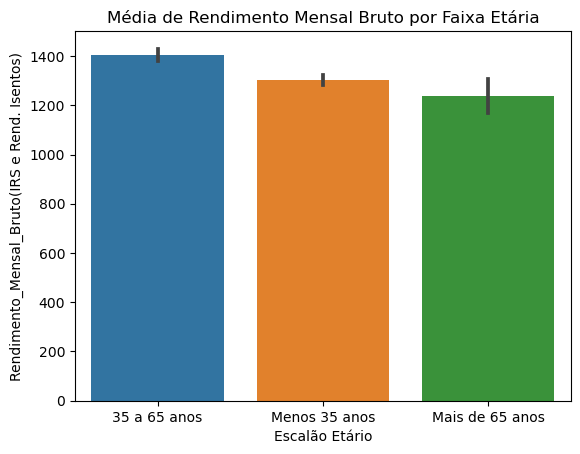

In [58]:
sns.barplot(x='Escalão Etário', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', data=df)
plt.title('Média de Rendimento Mensal Bruto por Faixa Etária')
plt.show()


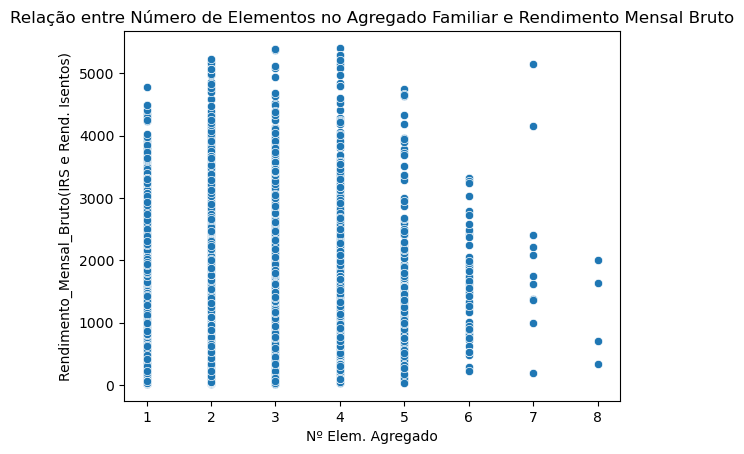

In [59]:
sns.scatterplot(x='Nº Elem. Agregado', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', data=df)
plt.title('Relação entre Número de Elementos no Agregado Familiar e Rendimento Mensal Bruto')
plt.show()

#### ---- Rendimento Mensal Bruto vs. Monoparental e Faixa Etária

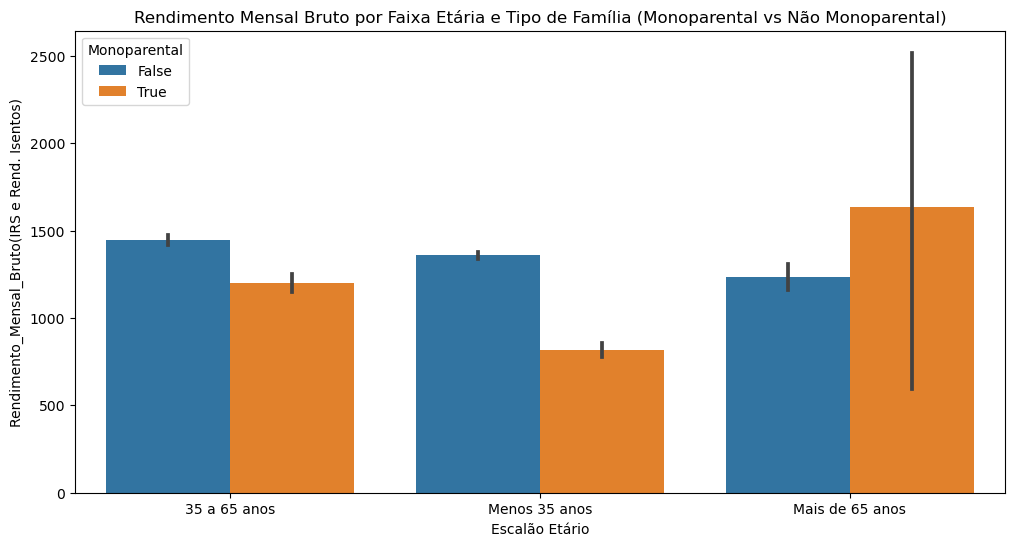

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Escalão Etário', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', hue='Monoparental', data=df)
plt.title('Rendimento Mensal Bruto por Faixa Etária e Tipo de Família (Monoparental vs Não Monoparental)')
plt.show()


#### ------ Rendimento Mensal Bruto(IRS e Rend. Isentos) vs. Distritos

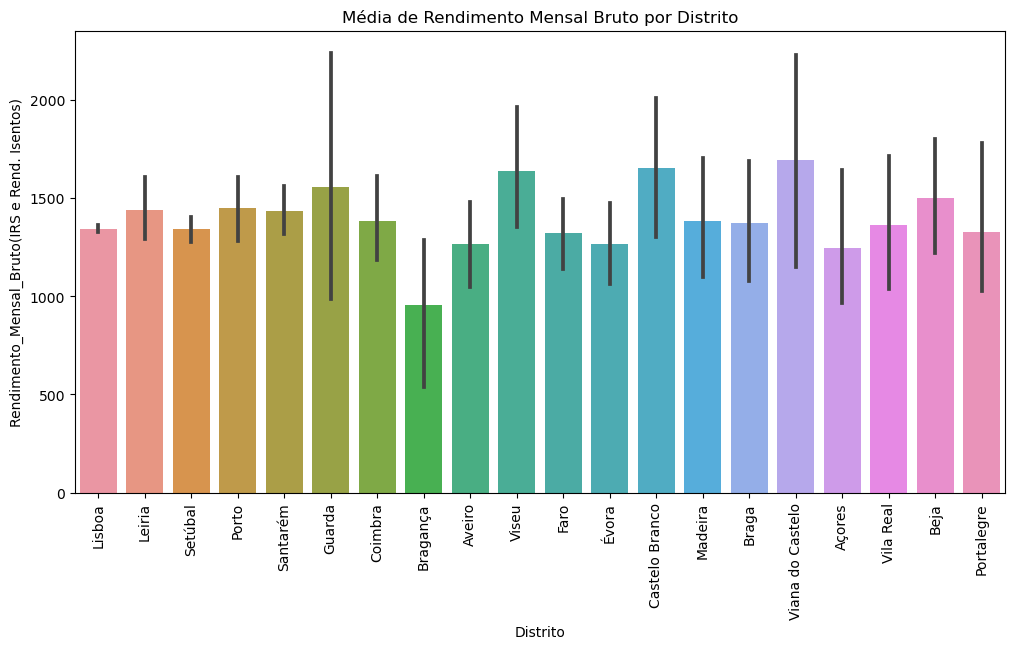

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Distrito', y='Rendimento_Mensal_Bruto(IRS e Rend. Isentos)', data=df)
plt.title('Média de Rendimento Mensal Bruto por Distrito')
plt.xticks(rotation=90)
plt.show()

#### ------- Número de Elementos no Agregado Familiar vs. Número de Adultos no Agregado Familiar

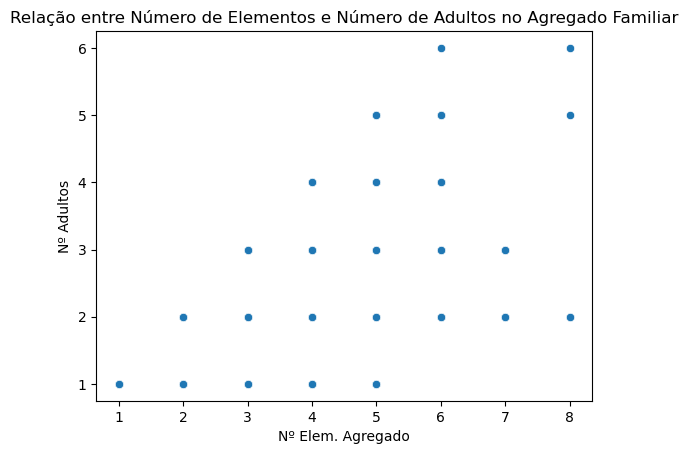

In [62]:
sns.scatterplot(x='Nº Elem. Agregado', y='Nº Adultos', data=df)
plt.title('Relação entre Número de Elementos e Número de Adultos no Agregado Familiar')
plt.show()

#### ------- Monoparental vs. Número de Elementos no Agregado Familiar

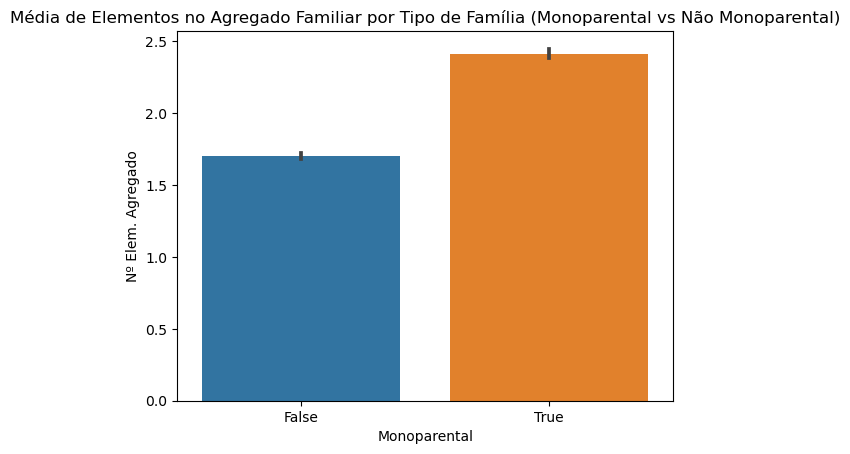

In [63]:
sns.barplot(x='Monoparental', y='Nº Elem. Agregado', data=df)
plt.title('Média de Elementos no Agregado Familiar por Tipo de Família (Monoparental vs Não Monoparental)')
plt.show()

Criar graficos pra nº criancas dependentes

####  Exportar

In [69]:
df.to_csv('dados.csv', index=False, encoding='utf-8-sig')
